# DM and ML assigment 2022-2
## Nicolas Penailillo X8GDMP

The dataset consists of data collected from heavy Scania trucks in everyday usage. The system in focus is the Air Pressure system (APS) which generates pressurized air that is utilized in various functions in a truck, such as braking and gear changes. The dataset’s positive class consists of component failures for a specific component of the APS system. The negative class consists of trucks with failures for components not related to the APS. The data consists of a subset of all available data, selected by experts. The goal is to predict whether the APS system has a failure and should be repaired, too.  A false positive prediction means that the mechanics checks the APS system unnecessarily, a false negative prediction that it is faulty, but not checked. Obviously, the latter has larger negative consequences.

## Dataset Information

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import fbeta_score,f1_score
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


In [ ]:
#load data
df_x = pd.read_csv('X_train.csv')
df_y = pd.read_csv('Y_train.csv')
df_x_test = pd.read_csv('X_test.csv')

In [ ]:
print(df_x.info())
print(df_x.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39900 entries, 0 to 39899
Columns: 171 entries, Id to eg_000
dtypes: float64(169), int64(2)
memory usage: 52.1 MB
None
                 Id        aa_000       ab_000        ac_000        ad_000  \
count  39900.000000  3.990000e+04  9121.000000  3.765900e+04  2.993400e+04   
mean   19949.500000  6.094339e+04     0.728210  3.536753e+08  2.872309e+05   
std    11518.282207  2.598214e+05     3.107561  7.927850e+08  4.961607e+07   
min        0.000000  0.000000e+00     0.000000  0.000000e+00  0.000000e+00   
25%     9974.750000  8.680000e+02     0.000000  1.600000e+01  2.400000e+01   
50%    19949.500000  3.082300e+04     0.000000  1.520000e+02  1.260000e+02   
75%    29924.250000  4.889650e+04     0.000000  9.700000e+02  4.340000e+02   
max    39899.000000  4.294967e+07   134.000000  2.130707e+09  8.584298e+09   

             ae_000        af_000        ag_000        ag_001        ag_002  \
count  38240.000000  38240.000000  3.943400e+04  

As we can see here  the dataset provided contains 170 features with 39900 rows with the corresponding predicted label.
The types contained in the columns are float64 and int64.
Total memory usage 52.1 MB

In [ ]:
print("Shape of dataset:",df_x.shape)

Shape of dataset: (39900, 171)


The shape is 39900 rows and 170 features

### Check missing values

To check the missing values we need to find the NaN values in our dataset

In [ ]:
df_x.isna().any()

Id        False
aa_000    False
ab_000     True
ac_000     True
ad_000     True
          ...  
ee_007     True
ee_008     True
ee_009     True
ef_000     True
eg_000     True
Length: 171, dtype: bool

To have a visual information of the NaN values in the dataset we can draw a heatmap of the missin values to see if we need to exclude columns or modify the dataset

<AxesSubplot: >

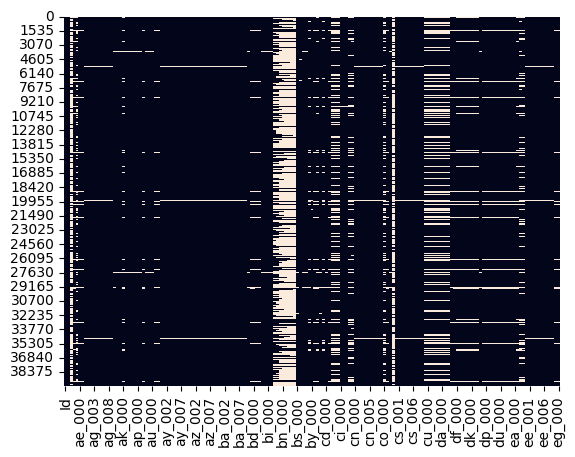

In [ ]:
sns.heatmap(df_x.isna(), cbar=False)

As we can see in the graph some columns have a lot of missing values, we are going to exclude columns with more than 70% of missing values

In [ ]:

original_columns = df_x.columns
df_x.dropna(axis = 1, thresh=df_x.shape[0]*0.7,inplace= True)

In [ ]:
new_columns = df_x.columns
bad_columns = []
for i in original_columns:
    if i not in new_columns:
        bad_columns.append(i)
print(bad_columns, len(bad_columns))
df_x_test.drop(bad_columns,axis = 1,inplace = True)

['ab_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'cr_000'] 10


### Replace missing values

with sklearn.impute Univariate imputer for completing missing values with simple strategies.
Replace missing values using a descriptive statistic (e.g. mean, median, or most frequent) along each column, or using a constant value.

In [ ]:
#mean missing replacement
mean_replacement = SimpleImputer(missing_values= np.nan , strategy="mean")
df_x = mean_replacement.fit_transform(df_x)
df_x_test = mean_replacement.fit_transform(df_x_test)


### Oversample 

The dataset is highly unbalanced, we are going to check the ammount of true and false values

In [ ]:
df_y["Expected"].value_counts()

0    39178
1      722
Name: Expected, dtype: int64

SMOTE is an oversampling method. It works by creating synthetic samples from the minor class instead of creating copies. The algorithm selects two or more similar instances (using a distance measure) and perturbing an instance one attribute at a time by a random amount within the difference to the neighboring instances.

In [ ]:
# transform the dataset
oversample = SMOTE()
df_x, df_y = oversample.fit_resample(df_x, df_y["Expected"])

In [ ]:
print(len(df_x))
print(df_y.value_counts())

78356
0    39178
1    39178
Name: Expected, dtype: int64


Now the dataset is balanced with the same ammount of labels

EXTRA: We can create more ways to visualize our dataset, one of them can be the boxplot

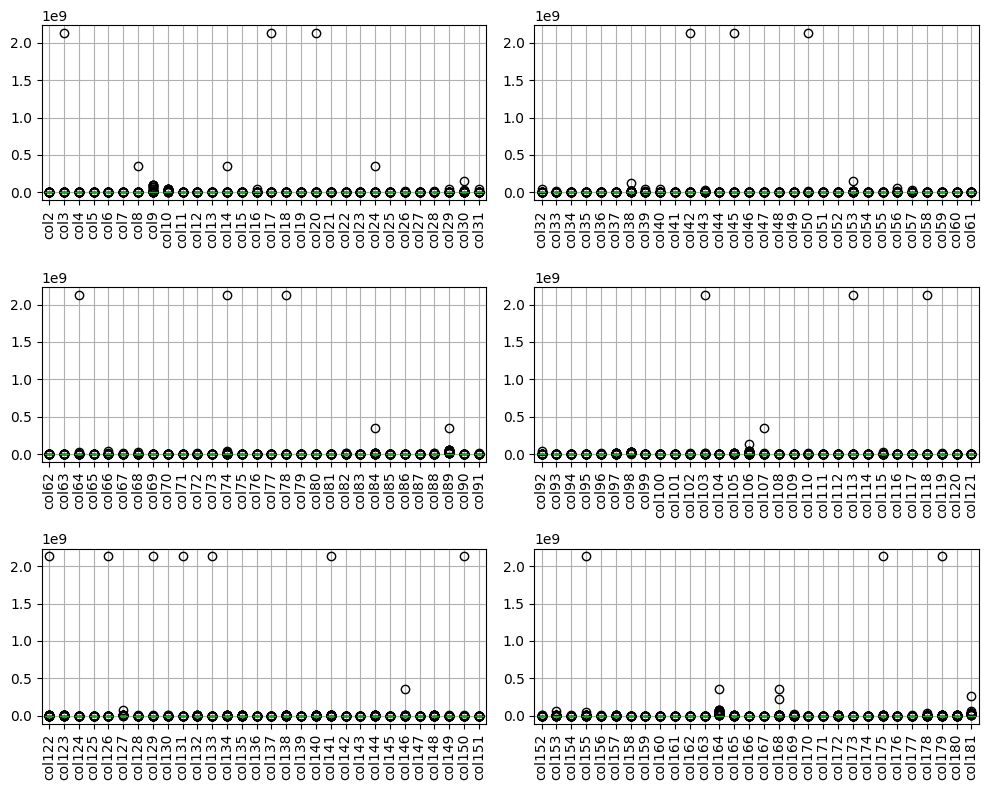

In [ ]:
# Create list of column names with the format "colN" (from 1 to N)
col_names = ['col' + str(i) for i in np.arange(df_x.shape[0]) + 1]
# Declare pandas.DataFrame object
df = pd.DataFrame(data=df_x.T, columns=col_names)

fig, axes = plt.subplots(3,2,figsize=(10, 8)) # create figure and axes

for id,columns in enumerate(range(1,171,30)):
    a = df.iloc[:, columns:columns+30].boxplot( ax=axes.flatten()[id])
    axes.flatten()[id].set_xticklabels(axes.flatten()[id].get_xticklabels(), rotation=90)
plt.tight_layout() 

plt.show()

### Model selection and Training

The general pipeline for every model will be apply a standard scaler or a PCA before apply the model. For models with hyperparameters we are going to use GridSearch to find the best values for them.

Before training the models we should pre process the data to reduce complexity and increase the accuracy depending on the models.
Data Scaling: Standardization involves rescaling the features such that they have the properties of a standard normal distribution with a mean of zero and a standard deviation of one. 
As many algorithms require features to be normalized we are going to use a StandardScaler before most of the algorithms (PCM, SVM, logistic regression, etc..) 
PCA: To reduce dimensionality of the features, we use PCA selecting the components such that the amount of variance that needs to be explained is greater than the percentage specified by n_components.

The GridSearch step will be diferent in the different methods changing the specific parameters for every model. Also gridSearch uses
k-fold CV, the training set is split into k smaller sets (other approaches are described below, but generally follow the same principles). 

The gridSearch scoring scorer will be the F3_score

After every GridSearch we fit the dataset and then predict the test set

### SVM

In [ ]:
#SVM

#Gridsearch CV with 3 fold crossvalidation
fthree_scorer = make_scorer(fbeta_score, beta=3)
pipe = Pipeline(steps=[("scaler", StandardScaler()), ("svm", SVC())])

parameters = {
    "svm__C": [0.1, 1, 10, 100, 1000],
}

GCV = GridSearchCV(pipe,param_grid=parameters, scoring = fthree_scorer, verbose = 1,cv=3, n_jobs = -1)
GCV.fit(df_x , df_y )

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC())]),
             n_jobs=-1, param_grid={'svm__C': [10]},
             scoring=make_scorer(fbeta_score, beta=3), verbose=1)

In [ ]:
# print best parameter after tuning
print(GCV.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(GCV.best_estimator_)

{'svm__C': 10}
Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(C=10))])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df_x, df_y  ,  test_size=0.30, random_state=42
)

pred_test = GCV.predict(X_test)
pred_test2 = GCV.predict(df_x_test)

print("\nPrediction accuracy for SVM ")
print(f"{accuracy_score(y_test, pred_test):.2%}\n")
print("F_3 score_train", fbeta_score(y_test, pred_test, beta=3))
print("F_1 score_train", f1_score(y_test, pred_test))
print("KAGGLE score", 0.69703)


my_dictionary = {}
my_dictionary['Id'] = 'Predicted'
for i in range(len(pred_test2)):
    my_dictionary[str(i)]=pred_test2[i]


with open('y_test_SVM.csv', 'w') as f:
    for key in my_dictionary.keys():
        f.write("%s,%s\n" % (key, my_dictionary[key]))
        


Prediction accuracy for SVM 
99.37%

F_3 score_train 0.9919760990183526
F_1 score_train 0.9936725096194955
KAGGLE score 0.69703


In [ ]:
#SVM

#Gridsearch CV with 3 fold crossvalidation
fthree_scorer = make_scorer(fbeta_score, beta=3)
pipe = Pipeline(steps=[("scaler", StandardScaler()),("PCA", PCA()) ,("svm", SVC())])

parameters = {
    "svm__C": [ 1, 10, 1000],
    "PCA__n_components": [1,2,3]
}

GCV = GridSearchCV(pipe,param_grid=parameters, scoring = fthree_scorer, verbose = 1,cv=2, n_jobs = -1)
GCV.fit(df_x , df_y )

Fitting 2 folds for each of 9 candidates, totalling 18 fits


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('PCA', PCA()), ('svm', SVC())]),
             n_jobs=-1,
             param_grid={'PCA__n_components': [1, 2, 3],
                         'svm__C': [1, 10, 1000]},
             scoring=make_scorer(fbeta_score, beta=3), verbose=1)

In [ ]:
# print best parameter after tuning
print(GCV.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(GCV.best_estimator_)

{'PCA__n_components': 3, 'svm__C': 10}
Pipeline(steps=[('scaler', StandardScaler()), ('PCA', PCA(n_components=3)),
                ('svm', SVC(C=10))])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df_x, df_y  ,  test_size=0.30, random_state=42
)

pred_test = GCV.predict(X_test)
pred_test2 = GCV.predict(df_x_test)

print("\nPrediction accuracy for SVM ")
print(f"{accuracy_score(y_test, pred_test):.2%}\n")
print("F_3 score_train", fbeta_score(y_test, pred_test, beta=3))
print("F_1 score_train", f1_score(y_test, pred_test))
print("KAGGLE score", 0.70237)


my_dictionary = {}
my_dictionary['Id'] = 'Predicted'
for i in range(len(pred_test2)):
    my_dictionary[str(i)]=pred_test2[i]


with open('y_test_SVM2.csv', 'w') as f:
    for key in my_dictionary.keys():
        f.write("%s,%s\n" % (key, my_dictionary[key]))


Prediction accuracy for SVM 
94.90%

F_3 score_train 0.9597072714121603
F_1 score_train 0.9495264154914754
KAGGLE score 0.70237


### XGB

In [ ]:
fthree_scorer = make_scorer(fbeta_score, beta=3)
pipe = Pipeline(steps=[("scaler", StandardScaler()), ("xgb", XGBClassifier())])

parameters = {
    "xgb__max_depth": [5,8,10],
    "xgb__n_estimators":[300,500,1000,2000]
}

#Gridsearch CV with 2 fold crossvalidation
GCV = GridSearchCV(pipe,param_grid=parameters, scoring = fthree_scorer, verbose = 1,cv=2, n_jobs = -1)
GCV.fit(df_x , df_y)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=None,
                                                      importance_type=No...
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'xgb__max_depth': [5, 8, 10],
                         'xgb__n_estimators': [300, 500, 1000, 2000]},
             scoring=make_scorer(fbeta_score, beta=3), verbose=1)

In [ ]:
# print best parameter after tuning
print(GCV.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(GCV.best_estimator_)

{'xgb__max_depth': 5, 'xgb__n_estimators': 2000}
Pipeline(steps=[('scaler', StandardScaler()),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monot

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df_x, df_y  ,  test_size=0.30, random_state=42
)

pred_test = GCV.predict(X_test)
pred_test2 = GCV.predict(df_x_test)

print("\nPrediction accuracy for XGB ")
print(f"{accuracy_score(y_test, pred_test):.2%}\n")
print("F_3 score_train", fbeta_score(y_test, pred_test, beta=3))
print("F_1 score_train", f1_score(y_test, pred_test))
print("KAGGLE score", 0.82832)


my_dictionary = {}
my_dictionary['Id'] = 'Predicted'
for i in range(len(pred_test2)):
    my_dictionary[str(i)]=pred_test2[i]


with open('y_test_XGB.csv', 'w') as f:
    for key in my_dictionary.keys():
        f.write("%s,%s\n" % (key, my_dictionary[key]))


Prediction accuracy for XGB 
100.00%

F_3 score 1.0
F_1 score 1.0


### LOGISTIC REGRESSION

In [ ]:
fthree_scorer = make_scorer(fbeta_score, beta=3)
pipe = Pipeline(steps=[("scaler", StandardScaler()), ("lr", LogisticRegression())])

parameters = {
    'lr__C': np.linspace(1,10,10) ,
    'lr__penalty': ['l1', 'l2'], 
    'lr__solver' : ['liblinear'],
    'lr__random_state' : [1] 
}

#Gridsearch CV with 5 fold crossvalidation
GCV = GridSearchCV(pipe, parameters, scoring = fthree_scorer,
                    cv = 5, verbose = 10, n_jobs = 6, return_train_score = True)
GCV.fit(df_x , df_y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lr', LogisticRegression())]),
             n_jobs=6,
             param_grid={'lr__C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
                         'lr__penalty': ['l1', 'l2'], 'lr__random_state': [1],
                         'lr__solver': ['liblinear']},
             return_train_score=True, scoring=make_scorer(fbeta_score, beta=3),
             verbose=10)

In [ ]:
# print best parameter after tuning
print(GCV.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(GCV.best_estimator_)

{'lr__C': 2.0, 'lr__penalty': 'l1', 'lr__random_state': 1, 'lr__solver': 'liblinear'}
Pipeline(steps=[('scaler', StandardScaler()),
                ('lr',
                 LogisticRegression(C=2.0, penalty='l1', random_state=1,
                                    solver='liblinear'))])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df_x, df_y  ,  test_size=0.30, random_state=42
)

pred_test = GCV.predict(X_test)
pred_test2 = GCV.predict(df_x_test)

print("\nPrediction accuracy for LR ")
print(f"{accuracy_score(y_test, pred_test):.2%}\n")
print("F_3 score_train", fbeta_score(y_test, pred_test, beta=3))
print("F_1 score_train", f1_score(y_test, pred_test))
print("KAGGLE score", 0.80227)


my_dictionary = {}
my_dictionary['Id'] = 'Predicted'
for i in range(len(pred_test2)):
    my_dictionary[str(i)]=pred_test2[i]


with open('y_test_LR.csv', 'w') as f:
    for key in my_dictionary.keys():
        f.write("%s,%s\n" % (key, my_dictionary[key]))


Prediction accuracy for LR 
97.62%

F_3 score_train 0.9713738990782584
F_1 score_train 0.9760096133213167
KAGGLE score 0.80227


### RANDOM FOREST

In [ ]:

fthree_scorer = make_scorer(fbeta_score, beta=3)
pipe = Pipeline(steps=[("scaler", StandardScaler()), ("rf", RandomForestClassifier())])

parameters = {
    'rf__n_estimators': [100, 200, 300, 500],
    'rf__max_depth' : [3, 5, 7, 9],
    # 'rf__min_samples_split' : [2, 3, 5, 7],
    # 'rf__min_samples_leaf' : [2, 3, 5, 7],
    'rf__random_state' : [1]
}

#Gridsearch CV with 2 fold crossvalidation
GCV = GridSearchCV(pipe, parameters, scoring = fthree_scorer,
                    cv = 2, verbose = 10, n_jobs = -1)
GCV.fit(df_x , df_y)


Fitting 2 folds for each of 16 candidates, totalling 32 fits


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [3, 5, 7, 9],
                         'rf__n_estimators': [100, 200, 300, 500],
                         'rf__random_state': [1]},
             scoring=make_scorer(fbeta_score, beta=3), verbose=10)

In [ ]:
# print best parameter after tuning
print(GCV.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(GCV.best_estimator_)

{'rf__max_depth': 9, 'rf__n_estimators': 500, 'rf__random_state': 1}
Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestClassifier(max_depth=9, n_estimators=500,
                                        random_state=1))])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df_x, df_y  ,  test_size=0.30, random_state=42
)

pred_test = GCV.predict(X_test)
pred_test2 = GCV.predict(df_x_test)

print("\nPrediction accuracy for RandomForest ")
print(f"{accuracy_score(y_test, pred_test):.2%}\n")
print("F_3 score_train", fbeta_score(y_test, pred_test, beta=3))
print("F_1 score_train", f1_score(y_test, pred_test))
print("KAGGLE score", 0.82716)


my_dictionary = {}
my_dictionary['Id'] = 'Predicted'
for i in range(len(pred_test2)):
    my_dictionary[str(i)]=pred_test2[i]


with open('y_test_RF.csv', 'w') as f:
    for key in my_dictionary.keys():
        f.write("%s,%s\n" % (key, my_dictionary[key]))


Prediction accuracy for RandomForest 
98.92%

F_3 score_train 0.9947768887980029
F_1 score_train 0.9892810235986951
KAGGLE score 0.82716


### CLUSTERING

In [ ]:
fthree_scorer = make_scorer(fbeta_score, beta=3)
pipe = Pipeline(steps=[("scaler", StandardScaler()), ("PCA",PCA()), ("kmeans", KMeans())])

parameters = {
    'kmeans__n_clusters': [2, 3, 4, 5],
    'PCA__n_components': [2, 3, 4],
}

#Gridsearch CV with 5 fold crossvalidation
GCV = GridSearchCV(pipe, parameters, scoring = fthree_scorer,
                    cv = 5, verbose = 10, n_jobs = -1)
GCV.fit(df_x , df_y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


c:\Users\NPJ\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [0.50695676        nan        nan        nan 0.55755798        nan
        nan        nan 0.50494344        nan        nan        nan]
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('PCA', PCA()), ('kmeans', KMeans())]),
             n_jobs=-1,
             param_grid={'PCA__n_components': [2, 3, 4],
                         'kmeans__n_clusters': [2, 3, 4, 5]},
             scoring=make_scorer(fbeta_score, beta=3), verbose=10)

In [ ]:
# print best parameter after tuning
print(GCV.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(GCV.best_estimator_)

{'PCA__n_components': 3, 'kmeans__n_clusters': 2}
Pipeline(steps=[('scaler', StandardScaler()), ('PCA', PCA(n_components=3)),
                ('kmeans', KMeans(n_clusters=2))])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df_x, df_y  ,  test_size=0.30, random_state=42
)

pred_test = GCV.predict(X_test)
pred_test2 = GCV.predict(df_x_test)

print("\nPrediction accuracy for Kmeans ")
print(f"{accuracy_score(y_test, pred_test):.2%}\n")
print("F_3 score_train", fbeta_score(y_test, pred_test, beta=3))
print("F_1 score_train", f1_score(y_test, pred_test))
print("KAGGLE score", 0.60304)


my_dictionary = {}
my_dictionary['Id'] = 'Predicted'
for i in range(len(pred_test2)):
    my_dictionary[str(i)]=pred_test2[i]


with open('y_test_kmeans.csv', 'w') as f:
    for key in my_dictionary.keys():
        f.write("%s,%s\n" % (key, my_dictionary[key]))


Prediction accuracy for Kmeans 
79.07%

F_3 score_train 0.617177576236709
F_1 score_train 0.7384811606526014
KAGGLE score 0.60304


### Naive Bayes

In [ ]:
fthree_scorer = make_scorer(fbeta_score, beta=3)
pipe = Pipeline(steps=[("scaler", StandardScaler()),  ("NB", GaussianNB())])

pipe.fit(df_x , df_y)

Pipeline(steps=[('scaler', StandardScaler()), ('NB', GaussianNB())])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df_x, df_y  ,  test_size=0.30, random_state=42
)

pred_test = pipe.predict(X_test)
pred_test2 = pipe.predict(df_x_test)

print("\nPrediction accuracy for NB ")
print(f"{accuracy_score(y_test, pred_test):.2%}\n")
print("F_3 score_train", fbeta_score(y_test, pred_test, beta=3))
print("F_1 score_train", f1_score(y_test, pred_test))
print("KAGGLE score", 0.75766)


my_dictionary = {}
my_dictionary['Id'] = 'Predicted'
for i in range(len(pred_test2)):
    my_dictionary[str(i)]=pred_test2[i]


with open('y_test_NB.csv', 'w') as f:
    for key in my_dictionary.keys():
        f.write("%s,%s\n" % (key, my_dictionary[key]))


Prediction accuracy for NB 
93.63%

F_3 score_train 0.9142690479866867
F_1 score_train 0.9343385640396248
KAGGLE score 0.75766


In [1]:
from prettytable import PrettyTable

pt=PrettyTable()
pt.field_names=["model","accuracy","f1scoretrain","f3scoretrain","Kaggle"]
pt.add_row(["SVM","99.37%","0.9936","0.9919","0.69703"])
pt.add_row(["SVM_PCA","94.90%","0.9495","0.9597","0.70237"])
pt.add_row(["XGB","100%","1","1","0.82832"])
pt.add_row(["LogisticRegression","97.62%","0.9760","0.9713","0.80227"])
pt.add_row(["RandomForest","98.92%","0.9892","0.9947","0.82716"])
pt.add_row(["KMeans","79.07%","0.7384","0.6171","0.60304"])
pt.add_row(["GaussianNB","93.63%","0.9343","0.9142","0.75766"])
print(pt)

+--------------------+----------+--------------+--------------+---------+
|       model        | accuracy | f1scoretrain | f3scoretrain |  Kaggle |
+--------------------+----------+--------------+--------------+---------+
|        SVM         |  99.37%  |    0.9936    |    0.9919    | 0.69703 |
|      SVM_PCA       |  94.90%  |    0.9495    |    0.9597    | 0.70237 |
|        XGB         |   100%   |      1       |      1       | 0.82832 |
| LogisticRegression |  97.62%  |    0.9760    |    0.9713    | 0.80227 |
|    RandomForest    |  98.92%  |    0.9892    |    0.9947    | 0.82716 |
|       KMeans       |  79.07%  |    0.7384    |    0.6171    | 0.60304 |
|     GaussianNB     |  93.63%  |    0.9343    |    0.9142    | 0.75766 |
+--------------------+----------+--------------+--------------+---------+


### Conclusion

There are many ways to handle a machine learning pipeline for a certain dataset. We can always divide the pipeline in different steps. Those are Data analysis, Data preprocessing, Choose a proper model, tuning hyperparameters and overview of the performances. In this particular case the data had a lot of unbalance and features with no value, so we had to order this data to be more robust. Afterwards we could normalize it and reduce dimensionality. We tried 7 different algorithms to fit the data, they had different performance measures and we can choose one of them viewing these measures.

The results in this report can be improved if the number of hyperparameters, kfold number, pipeline size is increased.

The best performance was obtain by the XGB model followed by RandomForest.
